In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')

<b><h1>SKEWED DISTRIBUTAED DATA</h1></b>

In [3]:
float(df['placement_exam_marks'].skew())

0.8356419499466834

In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

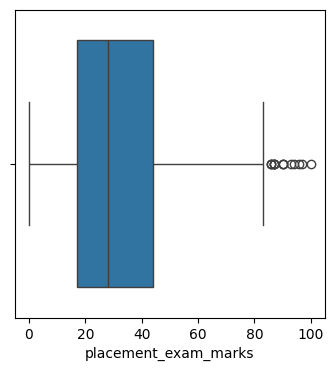

In [5]:
plt.figure(figsize=(4,4))
sns.boxplot(x = df['placement_exam_marks'])

In [6]:
q3 = float(df['placement_exam_marks'].quantile(0.75))
q1 = float(df['placement_exam_marks'].quantile(0.25))

iqr = q3 - q1

uplt = q3 + 1.5 * iqr
lolt = q1 - 1.5 * iqr
iqr, uplt, lolt

(27.0, 84.5, -23.5)

In [7]:
df[df['placement_exam_marks']>uplt]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


<h2>trimmin</h2>

In [8]:
df1 = df[df['placement_exam_marks']<uplt]

In [9]:
df1.shape

(985, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

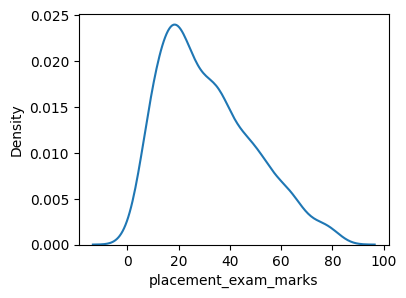

In [10]:
plt.figure(figsize=(4,3))
sns.kdeplot(df1['placement_exam_marks'])

<h2>capping</h2>

In [11]:
df['placement_exam_marks'] = np.where(df['placement_exam_marks']>uplt, uplt, df['placement_exam_marks'])

In [12]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

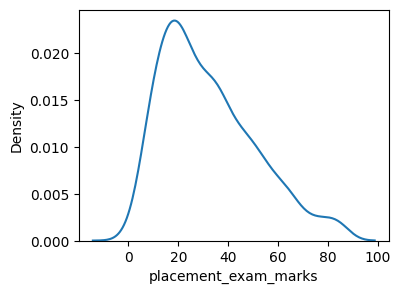

In [13]:
# here replacing a value is completed 
plt.figure(figsize=(4,3))
sns.kdeplot(df['placement_exam_marks'])

In [14]:
df.shape

(1000, 3)